In [19]:
print("Graphs")

Graphs


In [20]:
from utils import draw_graph, draw_graph_nodes

In [21]:
from collections import deque


class UndirectedGraph:
    def __init__(self, labels) -> None:
        self.labels = labels  # ["a", "b", "c"]
        self.num_vertices = len(labels)
        self.adj_matrix = [[0] * self.num_vertices for _ in range(self.num_vertices)]
        # [
        #  [0, 0, 0],
        #  [0, 0, 0],
        #  [0, 0, 0]
        # ]

    def label_to_index(self, label):
        if label not in self.labels:
            raise ValueError(f"label {label} not found in graph")
        return self.labels.index(label)

    def add_edge(self, label1, label2):  # g.add_edge("a", "b")
        u = self.label_to_index(label1)  # 0
        v = self.label_to_index(label2)  # 1
        self.adj_matrix[u][v] = 1
        self.adj_matrix[v][u] = 1

    def remove_edge(self, label1, label2):
        u = self.label_to_index(label1)
        v = self.label_to_index(label2)
        self.adj_matrix[u][v] = 0
        self.adj_matrix[v][u] = 0

    # depth first search -> stack -> (recursion)
    def dfs(self, start_label):
        visited = set()

        def dfs_helper(label):
            print(label)  # action
            visited.add(label)
            curr_ind = self.label_to_index(label)

            for neighbor_ind, is_connected in enumerate(self.adj_matrix[curr_ind]):
                neighbor_label = self.labels[neighbor_ind]
                if is_connected > 0 and neighbor_label not in visited:
                    dfs_helper(neighbor_label)

        dfs_helper(start_label)

    # breadth first search -> queue -> (iterative)
    def bfs(self, start_label):
        visited = set()
        queue = deque()
        queue.append(start_label)
        visited.add(start_label)
        while queue:
            curr_label = queue.popleft()
            print(curr_label)  # action
            curr_ind = self.label_to_index(curr_label)

            for neighbor_ind, is_connected in enumerate(self.adj_matrix[curr_ind]):
                neighbor_label = self.labels[neighbor_ind]
                if is_connected > 0 and neighbor_label not in visited:
                    queue.append(neighbor_label)
                    visited.add(neighbor_label)

[[0, 0, 0], [0, 0, 1], [0, 1, 0]]


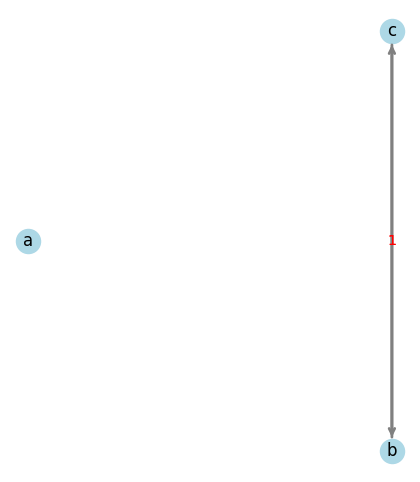

In [22]:
labels = ["a", "b", "c"]
ug = UndirectedGraph(labels)

ug.add_edge("a", "c")
ug.add_edge("c", "b")
ug.remove_edge("c", "a")

print(ug.adj_matrix)

draw_graph(ug)

flame traps
boring corridor
stairs
segway
mysterious mirrors
orc casino
lavatory
treasury
----------
flame traps
boring corridor
mysterious mirrors
orc casino
stairs
segway
lavatory
treasury


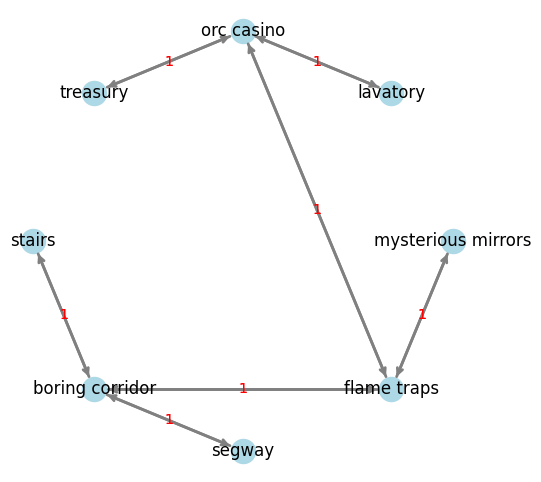

In [23]:
rooms = [
    "stairs",
    "boring corridor",
    "segway",
    "flame traps",
    "mysterious mirrors",
    "lavatory",
    "orc casino",
    "treasury",
]

dungeon = UndirectedGraph(rooms)
dungeon.add_edge("treasury", "orc casino")
dungeon.add_edge(rooms[5], rooms[6])
dungeon.add_edge(rooms[6], rooms[3])
dungeon.add_edge("boring corridor", "flame traps")
dungeon.add_edge("boring corridor", "stairs")
dungeon.add_edge("boring corridor", "segway")
dungeon.add_edge("mysterious mirrors", "flame traps")


dungeon.dfs("flame traps")
print("----------")
dungeon.bfs("flame traps")

draw_graph(dungeon)